In [1]:
!pip install lime shap imbalanced-learn scikit-image opencv-python

In [2]:
!pip install tf-explain
!pip install shap
!pip install lime

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle (3).json': b'{"username":"fenilmahesuriya","key":"063bff311860c5120be21724a0b14386"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!pip install -q kaggle
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000


Dataset URL: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000
License(s): CC-BY-NC-SA-4.0
skin-cancer-mnist-ham10000.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
import zipfile

with zipfile.ZipFile("skin-cancer-mnist-ham10000.zip", 'r') as zip_ref:
    zip_ref.extractall("ham10000")

# Check contents
!ls ham10000

ham10000_images_part_1	HAM10000_images_part_2	hmnist_28_28_RGB.csv
HAM10000_images_part_1	HAM10000_metadata.csv	hmnist_8_8_L.csv
ham10000_images_part_2	hmnist_28_28_L.csv	hmnist_8_8_RGB.csv


100%|██████████| 10015/10015 [01:24<00:00, 118.20it/s]


✅ Images shape: (10015, 128, 128, 3)
✅ Metadata shape: (10015, 3)
✅ Labels shape: (10015,)
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step

🔍 Training: Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



✅ Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.15      0.17        13
           1       0.48      0.62      0.54        21
           2       0.51      0.43      0.47        44
           3       0.00      0.00      0.00         4
           4       0.59      0.44      0.51        45
           5       0.86      0.89      0.88       268
           6       0.62      0.83      0.71         6

    accuracy                           0.74       401
   macro avg       0.46      0.48      0.47       401
weighted avg       0.74      0.74      0.74       401



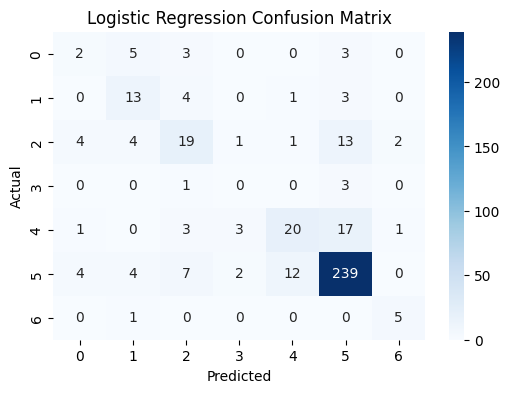


🔍 Training: Random Forest

✅ Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.67      0.10      0.17        21
           2       0.57      0.09      0.16        44
           3       0.00      0.00      0.00         4
           4       0.80      0.09      0.16        45
           5       0.70      1.00      0.82       268
           6       0.00      0.00      0.00         6

    accuracy                           0.69       401
   macro avg       0.39      0.18      0.19       401
weighted avg       0.65      0.69      0.59       401



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

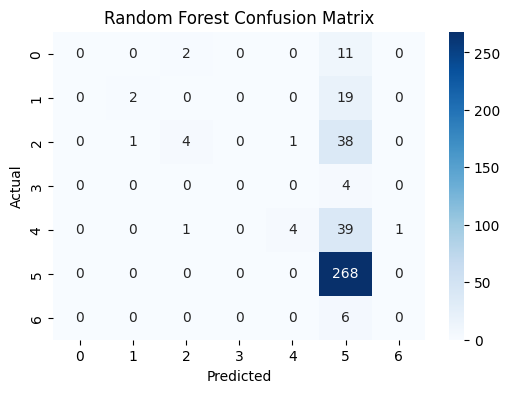


🔍 Training: SVM

✅ SVM Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.15      0.25        13
           1       0.59      0.48      0.53        21
           2       0.64      0.36      0.46        44
           3       0.00      0.00      0.00         4
           4       0.70      0.31      0.43        45
           5       0.77      0.97      0.86       268
           6       0.00      0.00      0.00         6

    accuracy                           0.75       401
   macro avg       0.48      0.32      0.36       401
weighted avg       0.72      0.75      0.71       401



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

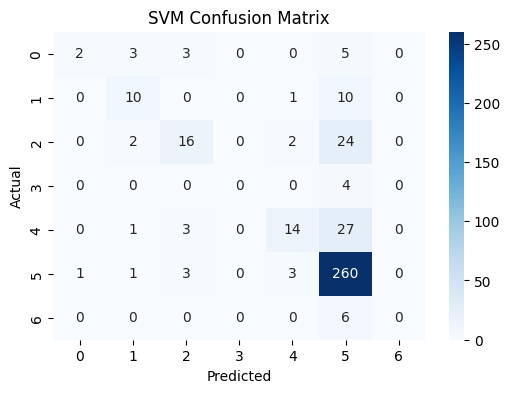

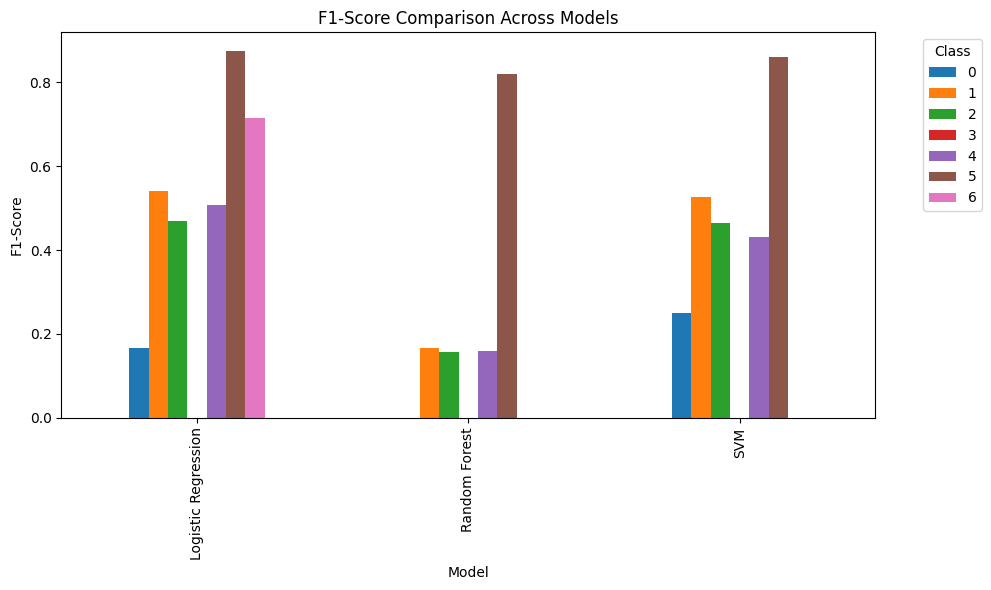

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Step 1: Load Metadata
df = pd.read_csv("ham10000/HAM10000_metadata.csv")

# Step 2: Prepare Labels
df = df[df['dx'].notna()]
df['label'] = LabelEncoder().fit_transform(df['dx'])

# Step 3: Load images from both folders
image_dir_1 = "ham10000/ham10000_images_part_1"
image_dir_2 = "ham10000/ham10000_images_part_2"

images = []
meta_features = []
labels = []

for i, row in tqdm(df.iterrows(), total=len(df)):
    img_path = os.path.join(image_dir_1, row['image_id'] + ".jpg")
    if not os.path.exists(img_path):
        img_path = os.path.join(image_dir_2, row['image_id'] + ".jpg")
    if not os.path.exists(img_path):
        continue  # skip missing image

    try:
        img = load_img(img_path, target_size=(128, 128))
        img = img_to_array(img)
        img = preprocess_input(img)
        images.append(img)

        meta_features.append([
            row['age'] if not np.isnan(row['age']) else 50,
            1 if row['sex'] == 'male' else 0,
            hash(row['localization']) % 100  # simple encoding
        ])

        labels.append(row['label'])
    except:
        continue

# Step 4: Convert to NumPy
X_img = np.array(images)
X_meta = np.array(meta_features)
y = np.array(labels)

print("✅ Images shape:", X_img.shape)
print("✅ Metadata shape:", X_meta.shape)
print("✅ Labels shape:", y.shape)

# Step 5: Extract deep features from ResNet50
resnet = ResNet50(weights='imagenet', include_top=False, pooling='avg', input_shape=(128, 128, 3))
features = resnet.predict(X_img, verbose=1, batch_size=32)

# Step 6: Combine with metadata
scaler = StandardScaler()
X_meta_scaled = scaler.fit_transform(X_meta)
X = np.concatenate([features, X_meta_scaled], axis=1)

# Step 7: PCA for dimensionality reduction
pca = PCA(n_components=100, random_state=42)
X_reduced = pca.fit_transform(X)

# Step 8: Reduce dataset size for speed (use 30%)
X_small, _, y_small, _ = train_test_split(X_reduced, y, train_size=0.2, stratify=y, random_state=42)

# Step 9: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=0.2, stratify=y_small, random_state=42)

# Step 10: Train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True)
}

results = {}

for name, model in models.items():
    print(f"\n🔍 Training: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = report

    print(f"\n✅ {name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Step 11: F1-score comparison
summary_df = pd.DataFrame({
    model: {label: metrics["f1-score"] for label, metrics in report.items() if label.isdigit()}
    for model, report in results.items()
}).T

summary_df.plot(kind="bar", figsize=(10, 6))
plt.title("F1-Score Comparison Across Models")
plt.ylabel("F1-Score")
plt.xlabel("Model")
plt.legend(title="Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

100%|██████████| 10015/10015 [01:22<00:00, 121.73it/s]


✅ Images shape: (10015, 128, 128, 3)
✅ Metadata shape: (10015, 3)
✅ Labels shape: (10015,)
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step

🔍 Training: Logistic Regression

✅ Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.77      0.76      1341
           1       0.77      0.78      0.78      1341
           2       0.68      0.64      0.66      1341
           3       0.86      0.91      0.89      1341
           4       0.67      0.67      0.67      1341
           5       0.79      0.72      0.75      1341
           6       0.96      0.99      0.98      1341

    accuracy                           0.78      9387
   macro avg       0.78      0.78      0.78      9387
weighted avg       0.78      0.78      0.78      9387



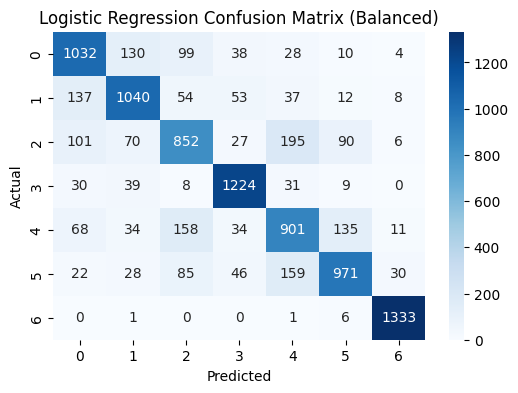


🔍 Training: Random Forest

✅ Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1341
           1       0.98      1.00      0.99      1341
           2       0.95      0.98      0.96      1341
           3       1.00      1.00      1.00      1341
           4       0.95      0.98      0.97      1341
           5       0.97      0.89      0.93      1341
           6       1.00      1.00      1.00      1341

    accuracy                           0.98      9387
   macro avg       0.98      0.98      0.98      9387
weighted avg       0.98      0.98      0.98      9387



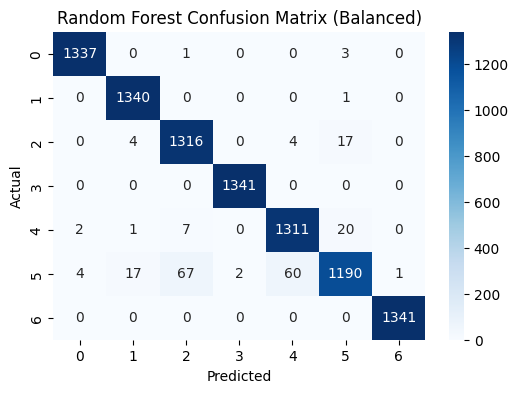


🔍 Training: SVM

✅ SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1341
           1       0.97      1.00      0.98      1341
           2       0.95      0.94      0.95      1341
           3       1.00      1.00      1.00      1341
           4       0.92      0.96      0.94      1341
           5       0.96      0.88      0.91      1341
           6       1.00      1.00      1.00      1341

    accuracy                           0.97      9387
   macro avg       0.97      0.97      0.97      9387
weighted avg       0.97      0.97      0.97      9387



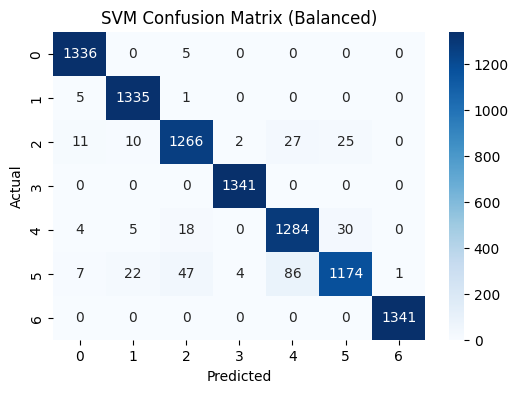

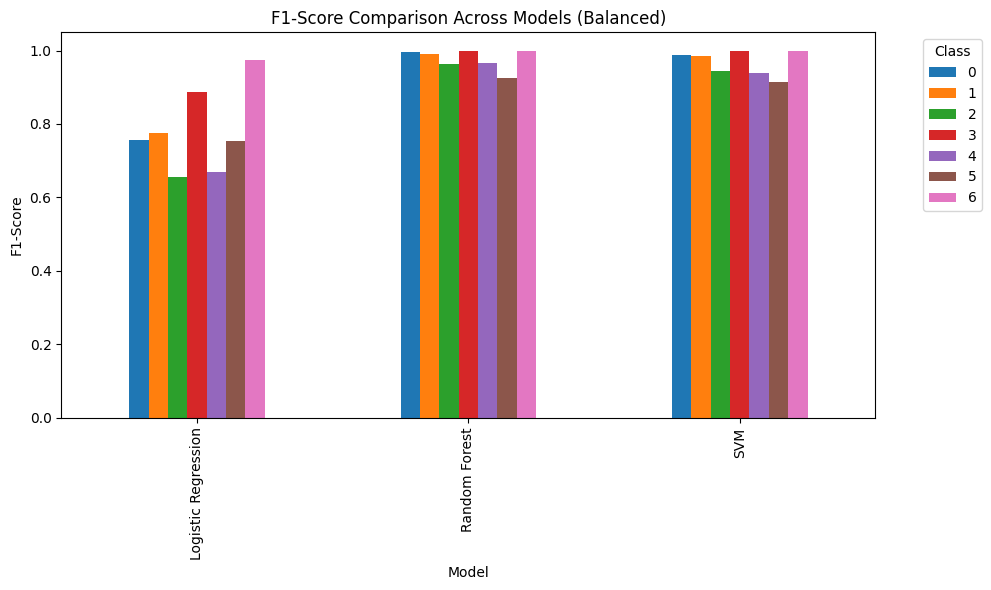

In [ ]:
# Updated Code with class imbalance handling and feature extraction
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Step 1: Load Metadata
df = pd.read_csv("ham10000/HAM10000_metadata.csv")

# Step 2: Prepare Labels
df = df[df['dx'].notna()]
df['label'] = LabelEncoder().fit_transform(df['dx'])

# Step 3: Load images from both folders
image_dir_1 = "ham10000/ham10000_images_part_1"
image_dir_2 = "ham10000/ham10000_images_part_2"

images = []
meta_features = []
labels = []

for i, row in tqdm(df.iterrows(), total=len(df)):
    img_path = os.path.join(image_dir_1, row['image_id'] + ".jpg")
    if not os.path.exists(img_path):
        img_path = os.path.join(image_dir_2, row['image_id'] + ".jpg")
    if not os.path.exists(img_path):
        continue

    try:
        img = load_img(img_path, target_size=(128, 128))
        img = img_to_array(img)
        img = preprocess_input(img)
        images.append(img)

        meta_features.append([
            row['age'] if not np.isnan(row['age']) else 50,
            1 if row['sex'] == 'male' else 0,
            hash(row['localization']) % 100
        ])

        labels.append(row['label'])
    except:
        continue

# Step 4: Convert to NumPy
X_img = np.array(images)
X_meta = np.array(meta_features)
y = np.array(labels)

print("\u2705 Images shape:", X_img.shape)
print("\u2705 Metadata shape:", X_meta.shape)
print("\u2705 Labels shape:", y.shape)

# Step 5: Extract deep features from ResNet50
resnet = ResNet50(weights='imagenet', include_top=False, pooling='avg', input_shape=(128, 128, 3))
features = resnet.predict(X_img, verbose=1, batch_size=32)

# Step 6: Combine with metadata
scaler = StandardScaler()
X_meta_scaled = scaler.fit_transform(X_meta)
X = np.concatenate([features, X_meta_scaled], axis=1)

# Step 7: PCA for dimensionality reduction
pca = PCA(n_components=100, random_state=42)
X_reduced = pca.fit_transform(X)

# Step 8: Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_reduced, y)

# Step 9: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42
)

# Step 10: Train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=3000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True)
}

results = {}

for name, model in models.items():
    print(f"\n\U0001F50D Training: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)
    results[name] = report

    print(f"\n\u2705 {name} Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=1))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix (Balanced)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Step 11: F1-score comparison
summary_df = pd.DataFrame({
    model: {label: metrics["f1-score"] for label, metrics in report.items() if label.isdigit()}
    for model, report in results.items()
}).T

summary_df.plot(kind="bar", figsize=(10, 6))
plt.title("F1-Score Comparison Across Models (Balanced)")
plt.ylabel("F1-Score")
plt.xlabel("Model")
plt.legend(title="Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Loading metadata...
Total samples available: 10015
Classes: ['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']
Processing maximum 2000 samples in batches of 100
Processing batch 1/20


Loading images: 100%|██████████| 100/100 [00:00<00:00, 144.10it/s]


Memory usage: 17.4%
Processing batch 2/20


Loading images: 100%|██████████| 100/100 [00:00<00:00, 155.73it/s]


Memory usage: 17.5%
Processing batch 3/20


Loading images: 100%|██████████| 100/100 [00:00<00:00, 154.88it/s]


Memory usage: 17.7%
Processing batch 4/20


Loading images: 100%|██████████| 100/100 [00:00<00:00, 158.50it/s]


Memory usage: 17.9%
Processing batch 5/20


Loading images: 100%|██████████| 100/100 [00:00<00:00, 154.65it/s]


Memory usage: 18.0%
Processing batch 6/20


Loading images: 100%|██████████| 100/100 [00:00<00:00, 134.10it/s]


Memory usage: 18.1%
Processing batch 7/20


Loading images: 100%|██████████| 100/100 [00:00<00:00, 112.43it/s]


Memory usage: 18.3%
Processing batch 8/20


Loading images: 100%|██████████| 100/100 [00:00<00:00, 153.46it/s]


Memory usage: 18.5%
Processing batch 9/20


Loading images: 100%|██████████| 100/100 [00:00<00:00, 154.36it/s]


Memory usage: 18.6%
Processing batch 10/20


Loading images: 100%|██████████| 100/100 [00:00<00:00, 163.20it/s]


Memory usage: 18.8%
Processing batch 11/20


Loading images: 100%|██████████| 100/100 [00:00<00:00, 150.67it/s]


Memory usage: 18.9%
Processing batch 12/20


Loading images: 100%|██████████| 100/100 [00:00<00:00, 155.36it/s]


Memory usage: 19.0%
Processing batch 13/20


Loading images: 100%|██████████| 100/100 [00:00<00:00, 159.25it/s]


Memory usage: 19.2%
Processing batch 14/20


Loading images: 100%|██████████| 100/100 [00:00<00:00, 155.89it/s]


Memory usage: 19.4%
Processing batch 15/20


Loading images: 100%|██████████| 100/100 [00:00<00:00, 154.36it/s]


Memory usage: 19.5%
Processing batch 16/20


Loading images: 100%|██████████| 100/100 [00:00<00:00, 154.83it/s]


Memory usage: 19.7%
Processing batch 17/20


Loading images: 100%|██████████| 100/100 [00:00<00:00, 107.49it/s]


Memory usage: 19.7%
Processing batch 18/20


Loading images: 100%|██████████| 100/100 [00:00<00:00, 127.13it/s]


Memory usage: 19.7%
Processing batch 19/20


Loading images: 100%|██████████| 100/100 [00:00<00:00, 147.86it/s]


Memory usage: 19.8%
Processing batch 20/20


Loading images: 100%|██████████| 100/100 [00:00<00:00, 155.95it/s]


Memory usage: 20.0%
Successfully processed 2000 images
Final dataset size: 2000 samples
Extracting deep features from ResNet50...


Extracting features: 100%|██████████| 125/125 [00:32<00:00,  3.83it/s]


Combining features with metadata...
Combined feature shape: (2000, 32771)
Applying PCA for dimensionality reduction...
PCA explained variance ratio: [0.08407349 0.0608273  0.05400401 0.04614702 0.030669   0.0269681
 0.01962325 0.01726799 0.01564561 0.01456483]
Applying SMOTE for class balancing...
Balanced dataset shape: (9359, 50)
Class distribution after SMOTE: [1337 1337 1337 1337 1337 1337 1337]
Training models...

🔍 Training: Logistic Regression
✅ Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       267
           1       0.75      0.81      0.78       267
           2       0.64      0.65      0.64       267
           3       0.88      0.94      0.91       268
           4       0.71      0.66      0.69       268
           5       0.79      0.68      0.73       267
           6       0.97      1.00      0.98       268

    accuracy                           0.79      1872
   macro avg

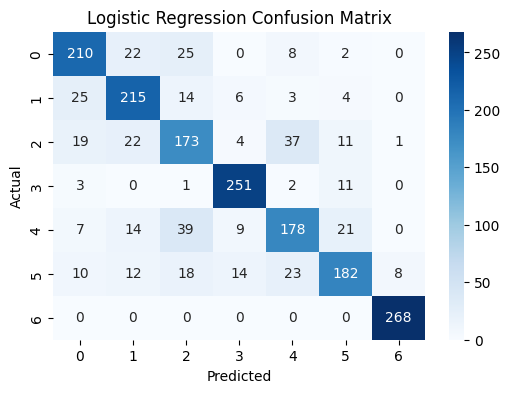


🔍 Training: Random Forest
✅ Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       267
           1       0.98      1.00      0.99       267
           2       0.96      0.96      0.96       267
           3       1.00      1.00      1.00       268
           4       0.94      0.98      0.96       268
           5       0.98      0.90      0.94       267
           6       1.00      1.00      1.00       268

    accuracy                           0.98      1872
   macro avg       0.98      0.98      0.98      1872
weighted avg       0.98      0.98      0.98      1872



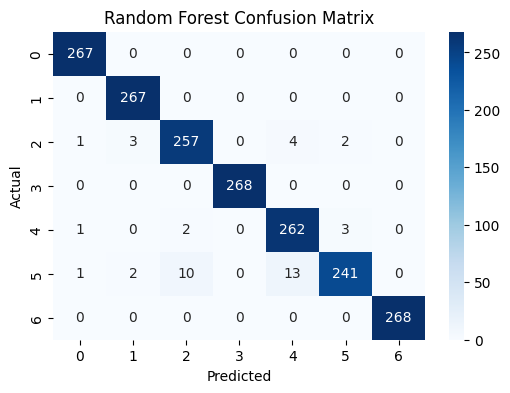


🔍 Training: SVM
✅ SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       267
           1       0.97      1.00      0.99       267
           2       0.94      0.96      0.95       267
           3       1.00      1.00      1.00       268
           4       0.94      0.94      0.94       268
           5       0.97      0.88      0.92       267
           6       0.99      1.00      1.00       268

    accuracy                           0.97      1872
   macro avg       0.97      0.97      0.97      1872
weighted avg       0.97      0.97      0.97      1872



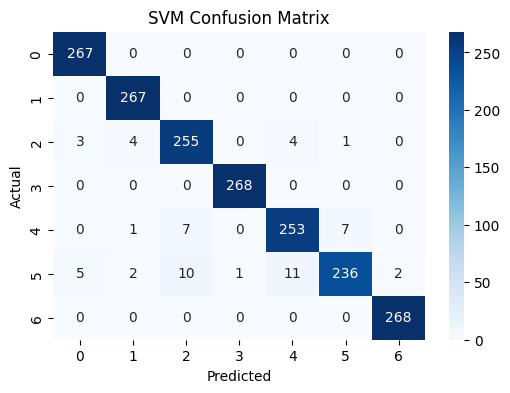

Comparing model performance...


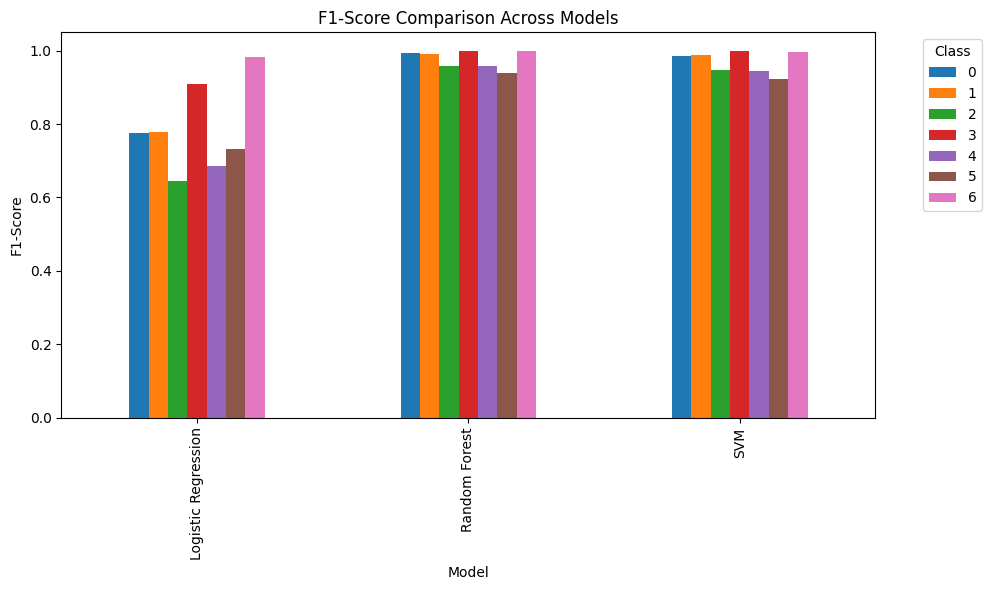


🧠 Generating Grad-CAM explanation...
Training Grad-CAM model with 500 samples...
Epoch 1/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 78s 705ms/step - loss: 1.7085
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 78ms/step - loss: 1.5195
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted class: 5, Confidence: 0.575
Grad-CAM failed: No such layer: conv5_block3_out. Existing layers are: ['resnet50', 'global_average_pooling2d', 'dense'].

📊 Calculating SHAP values...


 95%|=================== | 666/700 [00:16<00:00]       

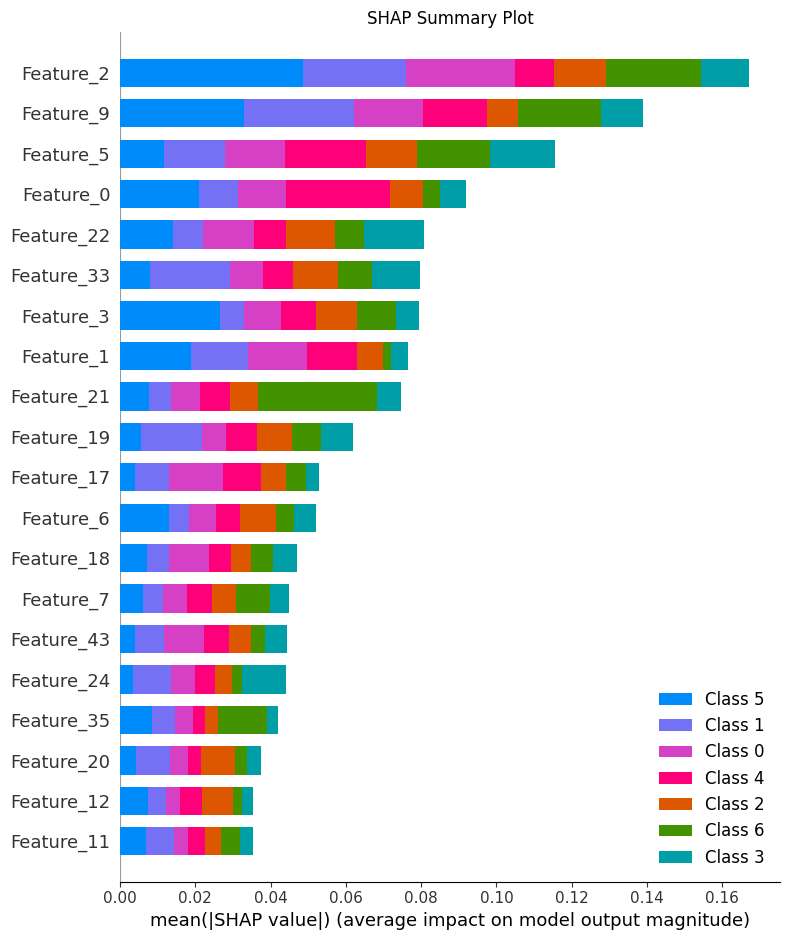


📍 LIME explanation for one instance...
LIME explanation saved to 'lime_explanation.html'


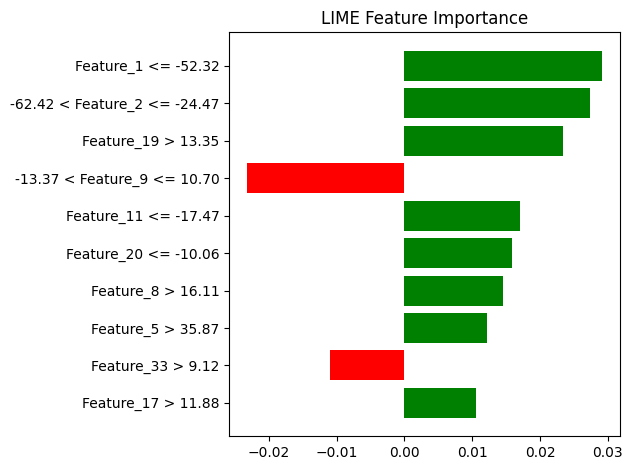


Analysis complete! Final memory usage: 39.6%


In [ ]:
# This code includes handling class imbalance, feature extraction using ResNet50, and visualization of model performance.
# It also includes SHAP and LIME for model interpretability.
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm
import gc
import psutil
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf

# Explainability imports
from tf_explain.core.grad_cam import GradCAM
import shap
from lime.lime_tabular import LimeTabularExplainer

# Memory management functions
def get_memory_usage():
    """Get current memory usage"""
    return psutil.virtual_memory().percent

def clear_memory():
    """Clear memory and run garbage collection"""
    gc.collect()
    tf.keras.backend.clear_session()

def process_images_in_batches(df, image_dir_1, image_dir_2, batch_size=100, max_samples=2000):
    """Process images in batches to prevent memory overflow"""
    print(f"Processing maximum {max_samples} samples in batches of {batch_size}")

    # Limit dataset size to prevent memory issues
    df_sample = df.sample(n=min(max_samples, len(df)), random_state=42).reset_index(drop=True)

    images = []
    meta_features = []
    labels = []
    processed_count = 0

    for batch_start in range(0, len(df_sample), batch_size):
        batch_end = min(batch_start + batch_size, len(df_sample))
        batch_df = df_sample.iloc[batch_start:batch_end]

        print(f"Processing batch {batch_start//batch_size + 1}/{(len(df_sample)-1)//batch_size + 1}")

        batch_images = []
        batch_meta = []
        batch_labels = []

        for i, row in tqdm(batch_df.iterrows(), total=len(batch_df), desc="Loading images"):
            img_path = os.path.join(image_dir_1, row['image_id'] + ".jpg")
            if not os.path.exists(img_path):
                img_path = os.path.join(image_dir_2, row['image_id'] + ".jpg")
            if not os.path.exists(img_path):
                continue

            try:
                # Load and preprocess image
                img = load_img(img_path, target_size=(128, 128))
                img = img_to_array(img)
                img = preprocess_input(img)
                batch_images.append(img)

                # Extract metadata features
                batch_meta.append([
                    row['age'] if not np.isnan(row['age']) else 50,
                    1 if row['sex'] == 'male' else 0,
                    hash(row['localization']) % 100
                ])

                batch_labels.append(row['label'])
                processed_count += 1

            except Exception as e:
                print(f"Error processing image {row['image_id']}: {e}")
                continue

        # Add batch to main lists
        images.extend(batch_images)
        meta_features.extend(batch_meta)
        labels.extend(batch_labels)

        # Clear batch memory
        del batch_images, batch_meta, batch_labels
        clear_memory()

        print(f"Memory usage: {get_memory_usage():.1f}%")

        # Stop if memory usage is too high
        if get_memory_usage() > 80:
            print("Memory usage too high, stopping early")
            break

    print(f"Successfully processed {processed_count} images")
    return np.array(images), np.array(meta_features), np.array(labels)

def extract_features_in_batches(X_img, batch_size=32):
    """Extract features using ResNet50 in batches"""
    print("Extracting deep features from ResNet50...")

    # Initialize ResNet50
    resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

    features_list = []

    for i in tqdm(range(0, len(X_img), batch_size), desc="Extracting features"):
        batch_end = min(i + batch_size, len(X_img))
        batch_features = resnet.predict(X_img[i:batch_end], verbose=0)
        features_list.append(batch_features)

        # Clear memory periodically
        if i % (batch_size * 10) == 0:
            clear_memory()

    # Concatenate all features
    features = np.concatenate(features_list, axis=0)

    # Clear memory
    del features_list
    clear_memory()

    return features

# Step 1: Load Metadata
print("Loading metadata...")
df = pd.read_csv("ham10000/HAM10000_metadata.csv")

# Step 2: Prepare Labels
df = df[df['dx'].notna()]
df['label'] = LabelEncoder().fit_transform(df['dx'])

print(f"Total samples available: {len(df)}")
print(f"Classes: {df['dx'].unique()}")

# Step 3: Load images with memory management
image_dir_1 = "ham10000/ham10000_images_part_1"
image_dir_2 = "ham10000/ham10000_images_part_2"

# Process images in batches with limited sample size
X_img, X_meta, y = process_images_in_batches(df, image_dir_1, image_dir_2,
                                           batch_size=100, max_samples=2000)

if len(X_img) == 0:
    print("No images processed successfully. Check file paths.")
    exit()

print(f"Final dataset size: {len(X_img)} samples")

# Step 4: Extract deep features in batches
features = extract_features_in_batches(X_img, batch_size=16)

# Step 5: Combine with metadata
print("Combining features with metadata...")
scaler = StandardScaler()
X_meta_scaled = scaler.fit_transform(X_meta)
X = np.concatenate([features.reshape(features.shape[0], -1), X_meta_scaled], axis=1)

# Clear large arrays from memory
del features
clear_memory()

print(f"Combined feature shape: {X.shape}")

# Step 6: PCA for dimensionality reduction
print("Applying PCA for dimensionality reduction...")
pca = PCA(n_components=min(50, X.shape[1]), random_state=42)
X_reduced = pca.fit_transform(X)

print(f"PCA explained variance ratio: {pca.explained_variance_ratio_[:10]}")

# Step 7: Apply SMOTE to balance classes
print("Applying SMOTE for class balancing...")
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_reduced, y)

print(f"Balanced dataset shape: {X_balanced.shape}")
print(f"Class distribution after SMOTE: {np.bincount(y_balanced)}")

# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42
)

# Step 9: Train models
print("Training models...")
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1),
    "SVM": SVC(kernel='rbf', probability=True, gamma='scale')
}

results = {}

for name, model in models.items():
    print(f"\n🔍 Training: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)
    results[name] = report

    print(f"✅ {name} Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=1))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Step 10: F1-score comparison
print("Comparing model performance...")
summary_df = pd.DataFrame({
    model: {label: metrics["f1-score"] for label, metrics in report.items() if label.isdigit()}
    for model, report in results.items()
}).T

summary_df.plot(kind="bar", figsize=(10, 6))
plt.title("F1-Score Comparison Across Models")
plt.ylabel("F1-Score")
plt.xlabel("Model")
plt.legend(title="Class", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Step 11: Grad-CAM for explainability
print("\n🧠 Generating Grad-CAM explanation...")
try:
    # Build a smaller model for Grad-CAM
    resnet_gc = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    model_gc = tf.keras.Sequential([
        resnet_gc,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
    ])
    model_gc.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

    # Use only a small subset for training
    subset_size = min(500, len(X_img))
    sample_indices = np.random.choice(len(X_img), subset_size, replace=False)
    X_img_subset = X_img[sample_indices]
    y_subset = y[sample_indices]

    print(f"Training Grad-CAM model with {subset_size} samples...")
    model_gc.fit(X_img_subset, y_subset, epochs=2, batch_size=16, verbose=1)

    # Generate Grad-CAM for one sample
    explainer_gc = GradCAM()
    sample_input = np.expand_dims(X_img[0], axis=0)
    prediction = model_gc.predict(sample_input)
    predicted_class = np.argmax(prediction)

    print(f"Predicted class: {predicted_class}, Confidence: {prediction[0][predicted_class]:.3f}")

    grid = explainer_gc.explain(
        (sample_input, None),
        model_gc,
        class_index=predicted_class,
        layer_name='conv5_block3_out'
    )

    # Plot original image and Grad-CAM
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Original image
    orig_img = (X_img[0] + 1) / 2  # Denormalize
    axes[0].imshow(orig_img)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    # Grad-CAM heatmap
    axes[1].imshow(grid)
    axes[1].set_title(f"Grad-CAM Heatmap (Class {predicted_class})")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

    # Clear model memory
    del model_gc, resnet_gc
    clear_memory()

except Exception as e:
    print(f"Grad-CAM failed: {e}")

# Step 12: SHAP values (Random Forest)
print("\n📊 Calculating SHAP values...")
try:
    # Use smaller sample for SHAP to avoid memory issues
    shap_sample_size = min(100, len(X_test))
    X_shap = X_test[:shap_sample_size]

    explainer_shap = shap.Explainer(models["Random Forest"], X_train[:200])
    shap_values = explainer_shap(X_shap)

    # Create summary plot
    shap.summary_plot(shap_values, X_shap,
                     feature_names=[f"Feature_{i}" for i in range(X_shap.shape[1])],
                     show=False)
    plt.title("SHAP Summary Plot")
    plt.tight_layout()
    plt.show()

    # Clear SHAP memory
    del explainer_shap, shap_values
    clear_memory()

except Exception as e:
    print(f"SHAP analysis failed: {e}")

# Step 13: LIME explanation
print("\n📍 LIME explanation for one instance...")
try:
    lime_exp = LimeTabularExplainer(
        training_data=X_train[:500],  # Use smaller training set
        feature_names=[f'Feature_{i}' for i in range(X_train.shape[1])],
        class_names=[f'Class_{i}' for i in range(len(np.unique(y)))],
        mode='classification'
    )

    # Explain one instance
    explanation = lime_exp.explain_instance(
        X_test[0],
        models["Random Forest"].predict_proba,
        num_features=10
    )

    # Save explanation as HTML
    explanation.save_to_file('lime_explanation.html')
    print("LIME explanation saved to 'lime_explanation.html'")

    # Show in notebook if available
    try:
        explanation.show_in_notebook(show_table=True)
    except:
        print("Notebook display not available, explanation saved to file")

    # Plot LIME explanation
    fig = explanation.as_pyplot_figure()
    plt.title("LIME Feature Importance")
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"LIME analysis failed: {e}")

# Final memory cleanup
clear_memory()
print(f"\nAnalysis complete! Final memory usage: {get_memory_usage():.1f}%")